This analysis is in the order of Female then Male

In [1]:
install.packages('qtl') #Main package, for analysis
install.packages('qtlcharts') #accessory, for displaying graphs
install.packages('LinkageMapView') #accessory, for displaying linkage maps
install.packages('rcompanion')# for plotNormalHistogram

Installing package into 'C:/Users/Courtney/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'qtl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Courtney\AppData\Local\Temp\Rtmpe0ycTO\downloaded_packages


Installing package into 'C:/Users/Courtney/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'qtlcharts' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Courtney\AppData\Local\Temp\Rtmpe0ycTO\downloaded_packages


Installing package into 'C:/Users/Courtney/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'LinkageMapView' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Courtney\AppData\Local\Temp\Rtmpe0ycTO\downloaded_packages


Installing package into 'C:/Users/Courtney/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'rcompanion' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Courtney\AppData\Local\Temp\Rtmpe0ycTO\downloaded_packages


In [2]:
library(qtl) #load packages
library(qtlcharts)
library(LinkageMapView)
library(rcompanion)

In [3]:
#Collecting enviroment variables
print("Make sure to input names AS THEY APPEAR on the csv!!") #Just a user warning
fileName <- readline("Enter file name (Either FemaleMap.csv or MaleMap.csv): ") #Mapping table file
genotypeName <- c(readline("First Genotype (homozygous) (For example ll): "),
                  readline("Second Genotype (heterozygous) (for example lm): ")) #For example "nn", "np"
alleleName <- c(substr(genotypeName[2],1,1) ,substr(genotypeName[2],2,2))
naNames <- c("NA","--") #For example "NA", "--"
colNum <- as.numeric(readline("Column Number: ")) #Column for pheno of interest

[1] "Make sure to input names AS THEY APPEAR on the csv!!"


Enter file name (Either FemaleMap.csv or MaleMap.csv):  FemaleMap_Field2020.csv
First Genotype (homozygous) (For example ll):  ll
Second Genotype (heterozygous) (for example lm):  lm
Column Number:  52


 --Read the following data:
	 294  individuals
	 1100  markers
	 53  phenotypes


Warning message in summary.cross(cross):
"Some markers at the same position on chr 1,2,4,5,7,8,9,10,11,12,13,14,16,17,18,19; use jittermap()."


 --Cross type: bc 


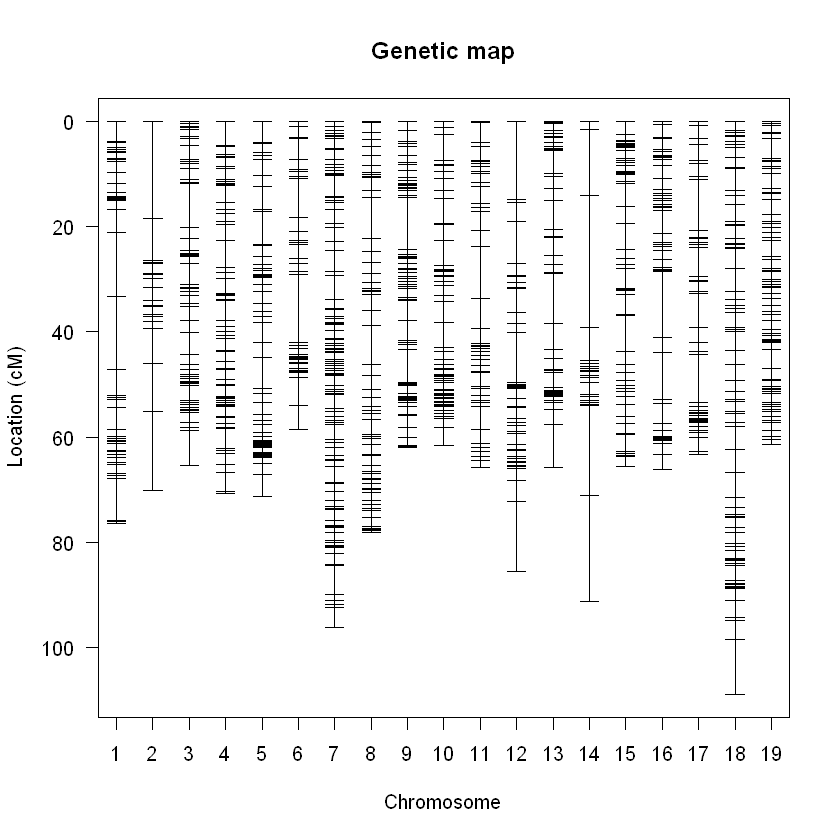

In [4]:
#Map generation
Map <- read.cross(format = 'csv',file = fileName 
                  ,genotypes = genotypeName,
                  alleles = alleleName,na.strings = naNames) #generate linkage map
Map <- jittermap(Map) #make sure no markers are in the same location
Map <- calc.genoprob(Map,step = 1,map.function = "kosambi") #associate markers with full genotypes
plot.map(Map) #draw linkage map

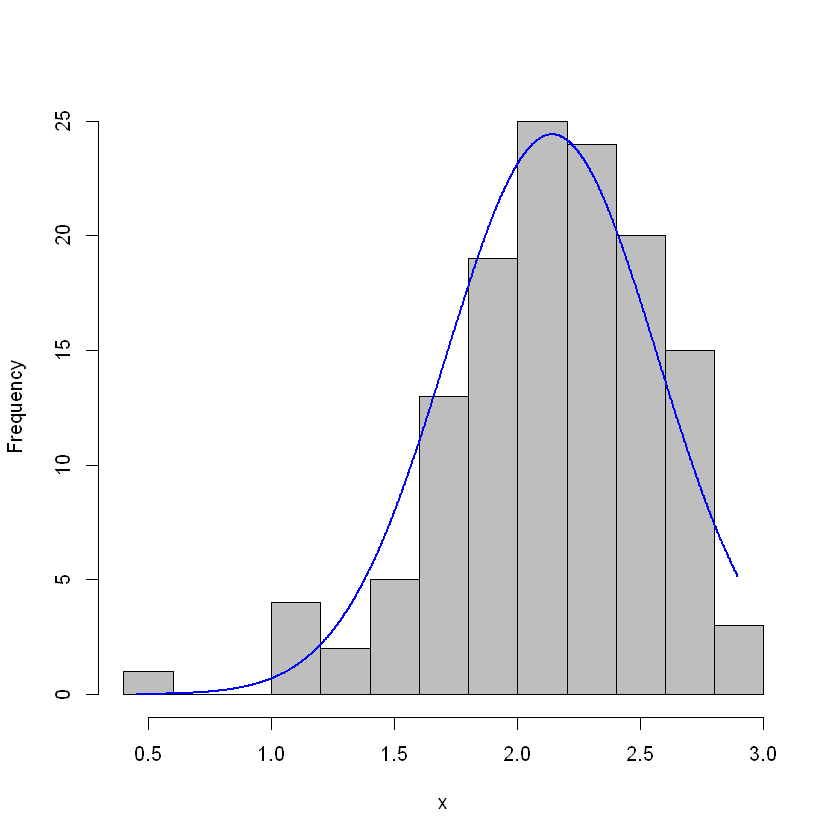

In [5]:
plotNormalHistogram(Map$pheno[,colNum]) #normal histogram of pheno of interest

Outliers exist in this dataset. Will need to be analyized. 

LOD thresholds (1000 permutations)
   [,1]
5% 4.44
1% 5.47

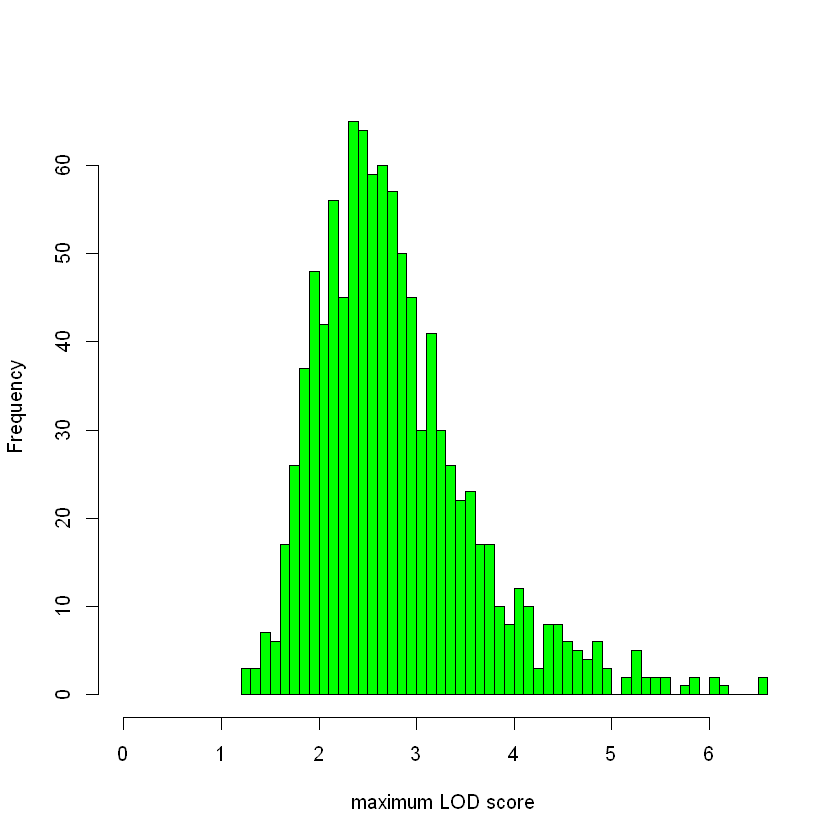

In [6]:
#Compute statistically significant values
TraitCIM1000 <- cim(Map,pheno.col = colNum,method = "hk",
                    map.function = "kosambi",n.perm = 1000) # Function will take a moment to run, determines LOD value
plot(TraitCIM1000,col = 'green') #show distribution of lod scores
summary(TraitCIM1000,alpha=c(.05,.01))

[1] "If nothing shows up, the values \n      are below the LOD5 score"


,chr,pos,lod
,<fct>,<dbl>,<dbl>
1_19075514,1,61.152034,0.7698318
c2.loc31,2,31.000000,1.1526068
5_2392618,3,49.555042,3.9215377
c4.loc50,4,50.000000,1.0346163
14_13969350,5,51.797030,1.1077997
c6.loc13,6,13.000000,0.5252592
c7.loc74,7,74.000000,0.7687645
8_4283686,8,0.270001,1.0501677
c9.loc3,9,3.000000,0.7010498


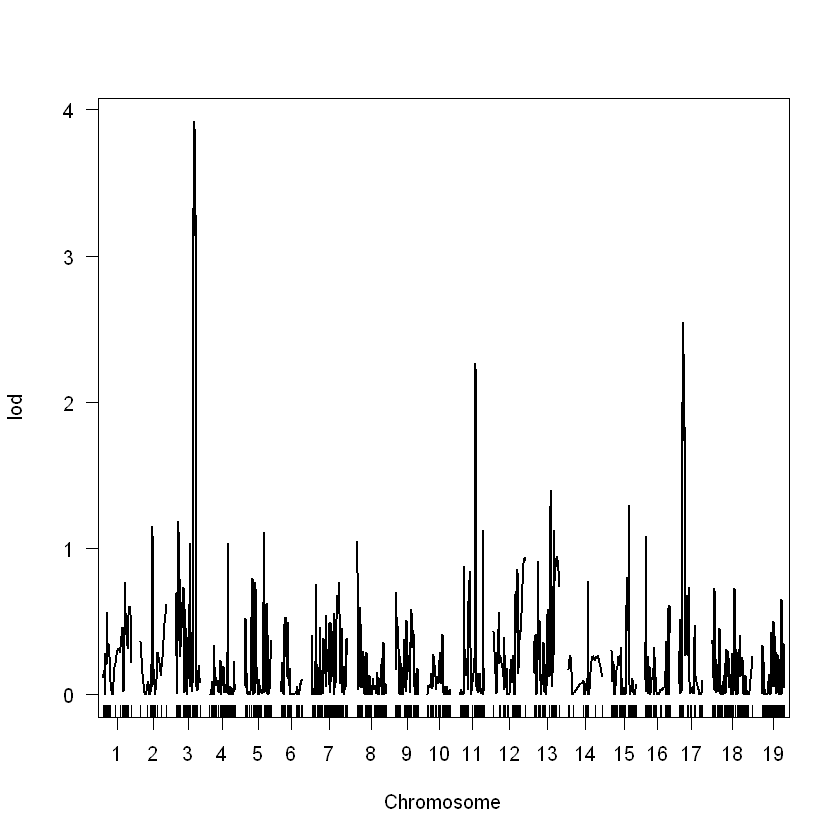

In [7]:
#Deterime LOD Values
LOD5 <- summary(TraitCIM1000,alpha=c(.05))
TraitCIM<-cim(Map,pheno.col = colNum,method = "hk",
              map.function = "kosambi") #Generate LOD Values
plot(TraitCIM) #show LOD graph
abline(h = LOD5,col = "blue") #overlay statistically significant line
print("If nothing shows up, the values 
      are below the LOD5 score") #warning for no peaks
summary(TraitCIM)
write.csv(TraitCIM,"PHENOTYPE_table.csv")

Chromosome?  3


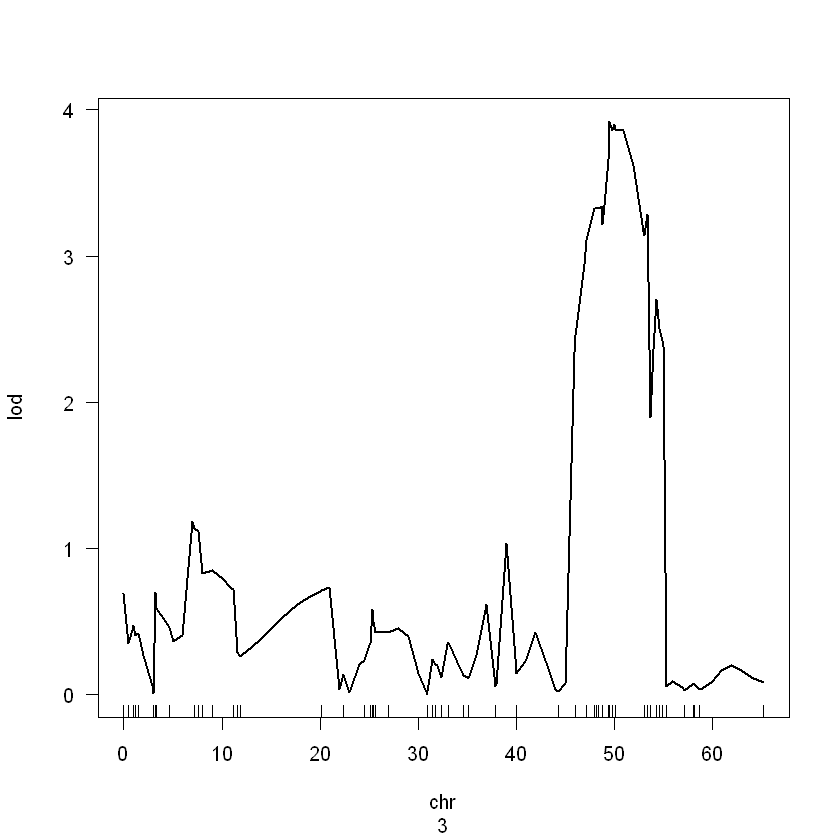

In [8]:
#Chromosomal Analysis
chr <- as.numeric(readline("Chromosome? ")) #collect chromosome to look at
plot(TraitCIM, chr = chr,xlab = c("chr",chr)) #Plot chr LOD scores
abline(h = LOD5, col = "blue") #Statistically Significant

In [9]:
bayesint(TraitCIM, chr = chr, prob=0.95, expandtomarkers=TRUE) #calculate bayesian interval
lodint(TraitCIM, chr = chr,expandtomarkers = TRUE ) #calculate LOD Support interval

,chr,pos,lod
,<fct>,<dbl>,<dbl>
3_8423519,3,47.21504,3.103594
5_2392618,3,49.55504,3.921538
12_11308873,3,53.38005,3.283190


,chr,pos,lod
,<fct>,<dbl>,<dbl>
3_7287592,3,44.35103,0.01967647
5_2392618,3,49.55504,3.92153766
3_16707449,3,54.90305,2.42150817


In [10]:
p <- as.numeric(readline("Position for analysis: "))
qtl <- makeqtl(Map, chr = chr, pos = p, what="prob") #pulls genotype probabilities
fitqtl <- fitqtl(Map, pheno.col=colNum, qtl = qtl, covar=NULL,
       method= "hk",model="normal",
       dropone=TRUE, get.ests=TRUE,run.checks=TRUE,
       tol=1e-4, maxit=1000, forceXcovar=FALSE) #sees how well our data fits a given formula 
          # If you see "error: object of type 'closure' is not subsettable", remove "formula," from the fitqtl argument list.
summary(fitqtl) #Print results of the analysis

Position for analysis:  49.55504


Warning message in getsex(cross):
"125 individuals with missing sex; assuming they're female"
Warning message in fitqtlengine(pheno = pheno, qtl = qtl, covar = covar, formula = formula, :
"Dropping 163 individuals with missing phenotypes.
"
Warning message in getsex(cross):
"125 individuals with missing sex; assuming they're female"



		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 131 

Full model result
----------------------------------  
Model formula: y ~ Q1 

       df        SS        MS      LOD     %var Pvalue(Chi2)    Pvalue(F)
Model   1  2.294789 2.2947889 2.881924 9.634813 0.0002694352 0.0003083462
Error 129 21.522891 0.1668441                                            
Total 130 23.817680                                                      


Estimated effects:
-----------------
              est      SE      t
Intercept 2.13240 0.03574 59.666
3@49.6    0.26509 0.07148  3.709


In [11]:
#Collecting enviroment variables
print("Make sure to input names AS THEY APPEAR on the csv!!") #Just a user warning
fileName <- readline("Enter file name (Either FemaleMap.csv or MaleMap.csv): ") #Mapping table file
genotypeName <- c(readline("First Genotype (homozygous) (For example ll): "),
                  readline("Second Genotype (heterozygous) (for example lm): ")) #For example "nn", "np"
alleleName <- c(substr(genotypeName[2],1,1) ,substr(genotypeName[2],2,2))
naNames <- c("NA","--") #For example "NA", "--"
colNum <- as.numeric(readline("Column Number: ")) #Column for pheno of interest

[1] "Make sure to input names AS THEY APPEAR on the csv!!"


Enter file name (Either FemaleMap.csv or MaleMap.csv):  MaleMap_Field2020.csv
First Genotype (homozygous) (For example ll):  nn
Second Genotype (heterozygous) (for example lm):  np
Column Number:  52


 --Read the following data:
	 294  individuals
	 1128  markers
	 53  phenotypes


Warning message in summary.cross(cross):
"Some markers at the same position on chr 1,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19; use jittermap()."


 --Cross type: bc 


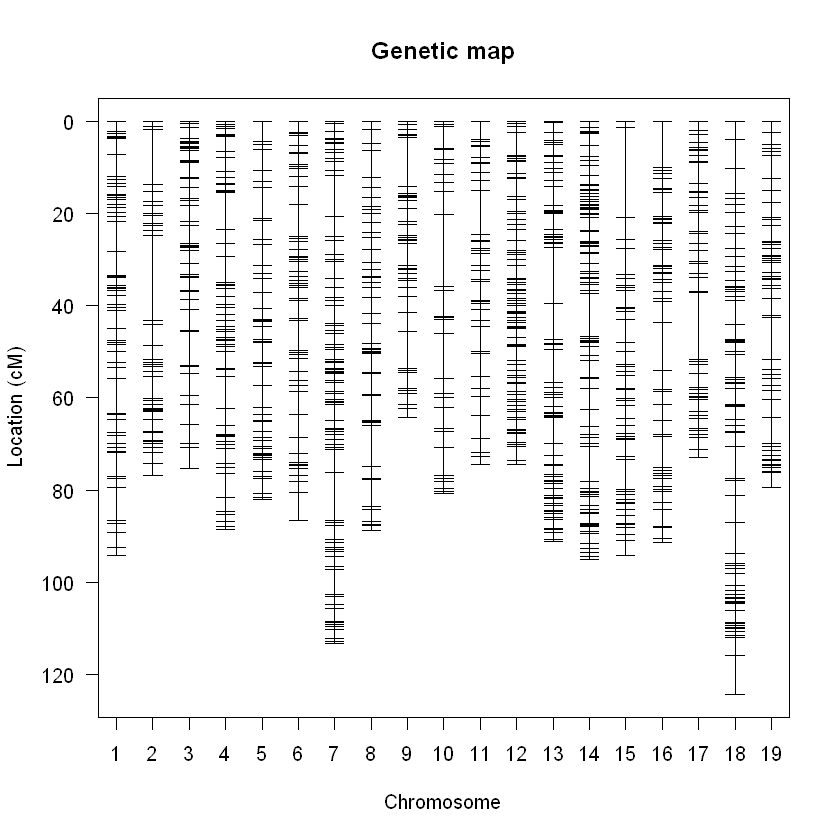

In [12]:
#Map generation
Map <- read.cross(format = 'csv',file = fileName 
                  ,genotypes = genotypeName,
                  alleles = alleleName,na.strings = naNames) #generate linkage map
Map <- jittermap(Map) #make sure no markers are in the same location
Map <- calc.genoprob(Map,step = 1,map.function = "kosambi") #associate markers with full genotypes
plot.map(Map) #draw linkage map

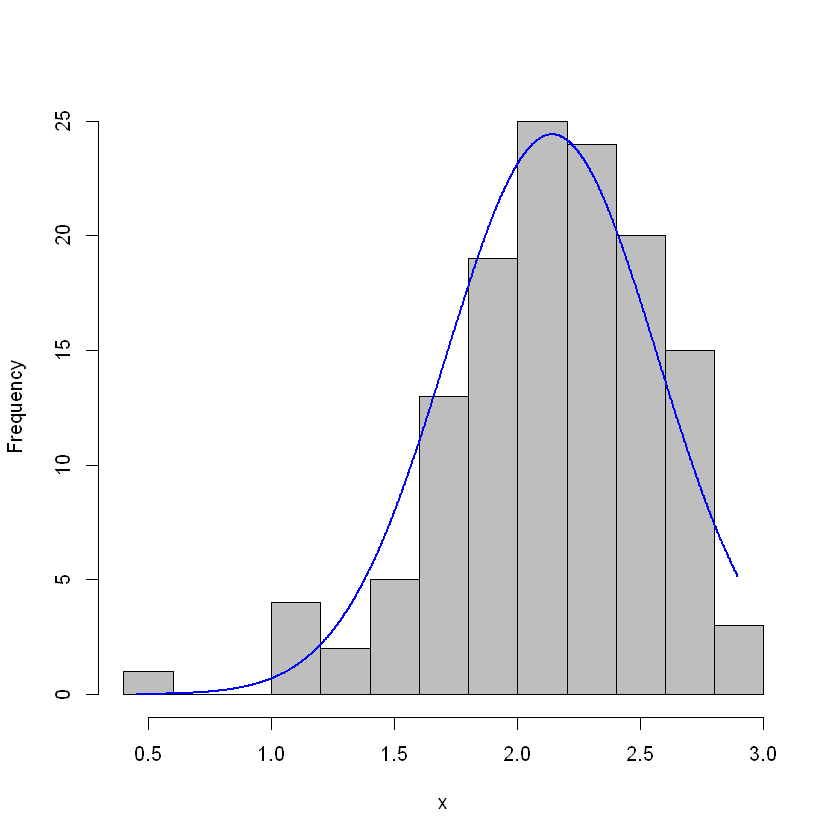

In [13]:
plotNormalHistogram(Map$pheno[,colNum]) #normal histogram of pheno of interest

Outliers exist in this data. 

LOD thresholds (1000 permutations)
   [,1]
5% 4.61
1% 5.73

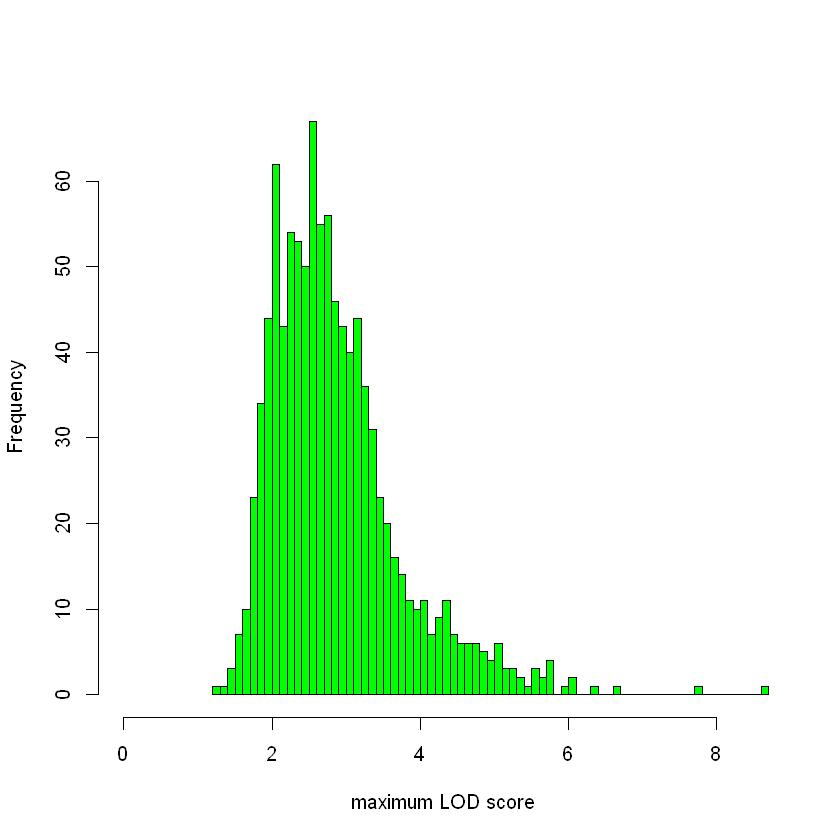

In [14]:
#Compute statistically significant values
TraitCIM1000 <- cim(Map,pheno.col = colNum,method = "hk",
                    map.function = "kosambi",n.perm = 1000) # Function will take a moment to run, determines LOD value
plot(TraitCIM1000,col = 'green') #show distribution of lod scores
summary(TraitCIM1000,alpha=c(.05,.01))

[1] "If nothing shows up, the values \n      are below the LOD5 score"


,chr,pos,lod
,<fct>,<dbl>,<dbl>
c1.loc88,1,88.000000,1.2574292
c2.loc47,2,47.000000,0.6396400
c3.loc54,3,54.000000,1.2989379
c4.loc45,4,45.000000,1.5609736
c5.loc12,5,12.000000,1.7472088
c6.loc34,6,34.000000,0.8367967
c7.loc60,7,60.000000,1.0250796
8_10699975,8,33.963017,0.4533474
c9.loc30,9,30.000000,1.4964793


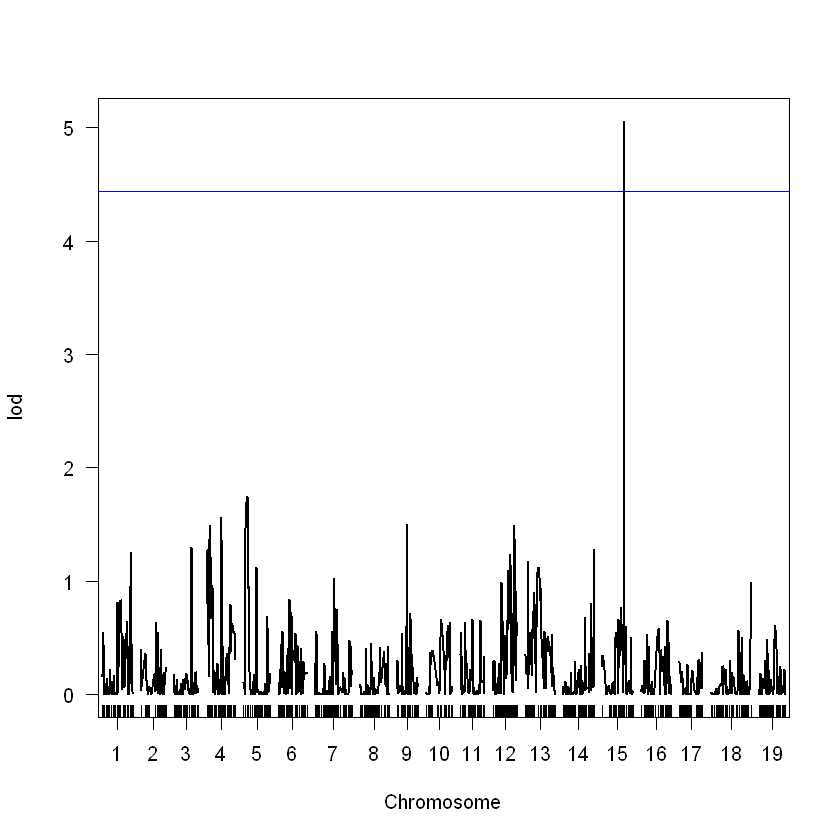

In [15]:
#Deterime LOD Values
TraitCIM<-cim(Map,pheno.col = colNum,method = "hk",
              map.function = "kosambi") #Generate LOD Values
plot(TraitCIM) #show LOD graph
abline(h = LOD5,col = "blue") #overlay statistically significant line
print("If nothing shows up, the values 
      are below the LOD5 score") #warning for no peaks
summary(TraitCIM)

Chromosome?  15


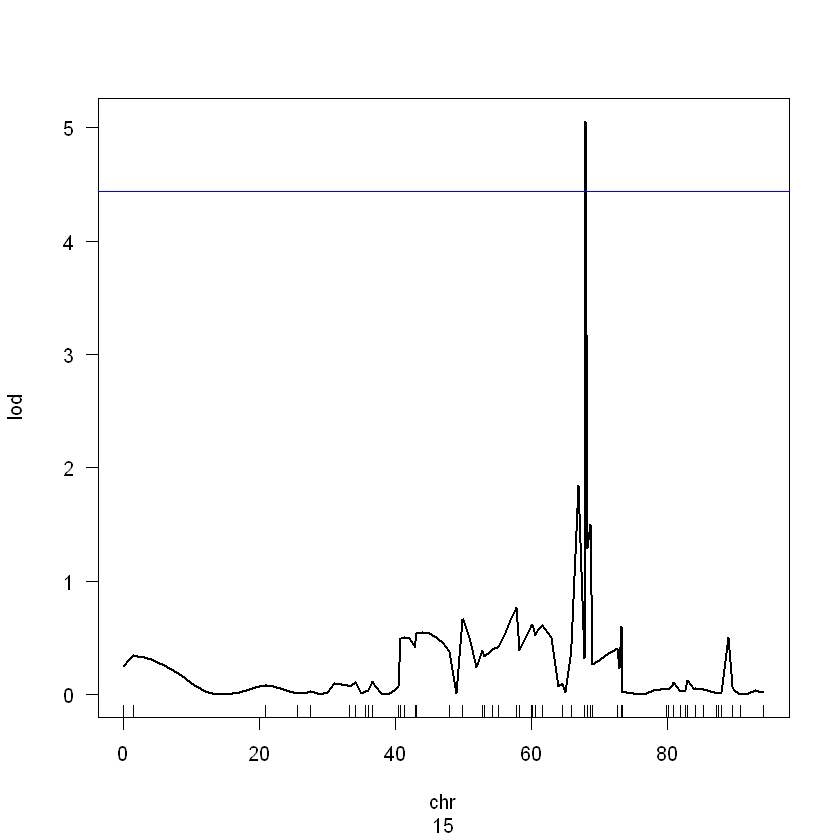

In [16]:
#Chromosomal Analysis
chr <- as.numeric(readline("Chromosome? ")) #collect chromosome to look at
plot(TraitCIM, chr = chr,xlab = c("chr",chr)) #Plot chr LOD scores
abline(h = LOD5, col = "blue") #Statistically Significant

In [17]:
bayesint(TraitCIM, chr = chr, prob=0.95, expandtomarkers=TRUE) #calculate bayesian interval
lodint(TraitCIM, chr = chr,expandtomarkers = TRUE ) #calculate LOD Support interval

,chr,pos,lod
,<fct>,<dbl>,<dbl>
15_15640823,15,67.79203,0.3152986
c15.loc68,15,68.00000,5.0561212
15_15938964,15,68.34003,1.2853680


,chr,pos,lod
,<fct>,<dbl>,<dbl>
15_15640823,15,67.79203,0.3152986
c15.loc68,15,68.00000,5.0561212
15_15938964,15,68.34003,1.2853680


In [18]:
p <- as.numeric(readline("Position for analysis: "))
qtl <- makeqtl(Map, chr = chr, pos = p, what="prob") #pulls genotype probabilities
fitqtl <- fitqtl(Map, pheno.col=colNum, qtl = qtl, covar=NULL,
       method= "hk",model="normal",
       dropone=TRUE, get.ests=TRUE,run.checks=TRUE,
       tol=1e-4, maxit=1000, forceXcovar=FALSE) #sees how well our data fits a given formula 
          # If you see "error: object of type 'closure' is not subsettable", remove "formula," from the fitqtl argument list.
summary(fitqtl) #Print results of the analysis

Position for analysis:  68.00000


Warning message in getsex(cross):
"125 individuals with missing sex; assuming they're female"
Warning message in fitqtlengine(pheno = pheno, qtl = qtl, covar = covar, formula = formula, :
"Dropping 163 individuals with missing phenotypes.
"
Warning message in getsex(cross):
"125 individuals with missing sex; assuming they're female"



		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 131 

Full model result
----------------------------------  
Model formula: y ~ Q1 

       df       SS        MS      LOD     %var Pvalue(Chi2)    Pvalue(F)
Model   1  3.41500 3.4150005 4.402402 14.33809 6.711294e-06 8.211177e-06
Error 129 20.40268 0.1581603                                            
Total 130 23.81768                                                      


Estimated effects:
-----------------
              est      SE      t
Intercept 2.14731 0.03479 61.726
15@68.0   1.63781 0.35247  4.647
